	NOMBRE Y APELLIDO DEL AUTOR:  Alejandra Cecilia Romero

    CURSO: Inteligencia Artificial: Generación de Prompts

	N° Comisión: 67115

	NOMBRE DEL PROYECTO:  Generador automático de Meditaciones Guíadas para Yoga: ShortMeditaIA

In [ ]:
Generación Automática de Meditaciones Guiadas 

Resumen

El objetivo de este proyecto es desarrollar un sistema que genere automáticamente una breve meditación de yoga y una imagen asociada a la misma. El sistema está orientado a ser utilizado como parte de pausas activas saludables recomendadas en home office. Se utilizará la API de OpenAI para GPT-3.5 turbo para generar un breve texto o en oportunidades solo palabras y luego la API de DALL-E para convertir esa descripción en una imagen.

Índice
    
1.	Introducción
2.	Objetivos
3.	Metodología
4.	Herramientas y Tecnologías
5.	Implementación
6.  Resultados
7.  Conclusiones
8.  Referencias

1. Introducción

Las pausas activas son descansos breves que se realizan durante la jornada laboral para ejercitar el cuerpo y mejorar la salud física y mental. Su objetivo es reducir el sedentarismo y los efectos negativos que este puede tener en la salud, como la fatiga, el estrés y los dolores musculares. Sirven para recuperar energía y mejorar el desempeño y la eficiencia. Algunos ejemplos pueden ser: estiramientos, respiración y meditación.
El sistema propuesto es para ser utilizado en forma autónoma en pausas activas durante la jornada laboral (home-office).
Una vez adquirido el hábito de tomar un breve descanso, este sistema hace que las personas que gusten de la temática de la meditación tengan resuelta la actividad y no desperdicien el tiempo buscando qué hacer.
Este sistema también puede ayudar a los profesores de yoga en la preparación de sus clases. En particular en la fase de la meditación para que la misma sea simple, breve y brinde distintas alternativas.

2. Objetivos

•	Generar un texto que guie a las personas para meditar por medio de visualizaciones.  El contenido del texto se generará a partir de unas breves indicaciones de la persona.
•	Crear una imagen asociada al texto de la meditación utilizando DALL-E y poder guardar esa imagen para que el profesor o practicante autodidacta pueda luego disponer de la misma.

    
 3. Metodología
Como primer paso realizar una breve investigación respecto al contexto a brindar para que esté relacionado con yoga y vida saludable aplicado a entornos de home-office. El prompt tendrá 3 puntos básicos:  se solicitará indicación de respiración, postura adecuada y generación de descripciones que puedan ayudar a la persona a crearse una visualización. Se limitará tanto la entrada como la salida a un max de tokens.

Respecto a los modelos de IA y su utilización:
•	Procesamiento de Texto: se utilizará GPT-3.5 turbo para generar un texto descriptivo que sirva para que cada persona pueda generarse una visualización en su mente durante una meditación.
En esta pre-entrega se está utilizando Zero-Shoot-Prompting. En función de indicaciones y contexto que se le da, genera la respuesta. Esto como vimos se debe a la capacidad de generalizar que tiene el modelo.  Se seguirá investigando posibilidad de utilizar One-Shoot-Promting sobre todo para que el texto para meditar sea conciso y respete 3 fases, como inicio, desarrollo y cierre.
En el inicio, el modelo daría las indicaciones de postura y respiración. En el desarrollo, daría el texto descriptivo de la meditación que es la parte que ayuda a la persona a crearse la visualización. Y en el cierre, sólo daría las indicaciones para volver a la rutina diaria.

•	Generación de imagen: se utilizará DALL-E para crear una imagen asociada a la descripción que sirva como recuerdo o ancla del momento. La imagen generada se necesitará guardar en donde el usuario lo indique.
En este caso lo que se hace es refinar la primer respuesta del sistema, con el objetivo de reducir el texto y quedarse con la parte más descriptiva que sirva para que DALL-E genere una imagen adecuada.

Presupuesto Tokens Estimados	(GPT 3.5 o 4)	
Entrada+Contexto:	150 tokens
	u$s  por Unidad:	0,00000015	
	u$s Total Estimado:	0,0000225
	Referencia:	$0.000150 / 1K input tokens	

Salida:	500 tokens
	u$s  por Unidad: 0,0000006	
	u$s Total Estimado: 0,0003	
	Referencia: $0.000600 / 1K output tokens	
               Imágenes: 	765 tokens
	u$s Total Estimado: 0,003825
	Referencia: 765 t 1024x1024// Total price: $0.003825	
U$S Total por 1 interacción (petición de meditación+imagen):	0,0041475		
Uso estimado: 2 veces por semana. Costo estimado por año u$S: 0,39816


4. Herramientas y Tecnologías
•	Python
•	OpenAI GPT-3.5 API
•	OpenAI DALL-E API 


In [ ]:
5. Implementación

1. Importar las dependencias

In [18]:
import openai
import requests
import os
from io import BytesIO
from PIL import Image

2. Usar la API Key

In [19]:
openai.api_key = "......"

3. Crear la solicitud

In [20]:
context = "Eres un experto en yoga y creas breves meditaciones guiadas. Recomiendas respiración y postura adecuadasen una fase de Inicio. En una sigueinte fase de Desarrrollo, generas un texto descriptivo que guie a los alumnos a crearse una visualización. Y en la fase de Cierre, haces que la persona vuelva a la rutina diaria. El texto no puede superar los 370 tokens"
prompt = "Indicar postura, respiración y texto descriptivo para meditar"


4. Settings

In [21]:
conversation = [
    {"role": "system", "content": context},
    {"role": "user", "content": prompt}
]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=conversation,
    max_tokens=370
    )
message = response.choices[0]['message']
print("{}: {}".format(message['role'], response.choices[0]['message']['content']))

assistant: Inicio:
Postura: Siéntate en el suelo con las piernas cruzadas, la espalda recta y las manos apoyadas suavemente sobre las rodillas.
Respiración: Inspira por la nariz profundamente, sintiendo cómo el aire llena tus pulmones, y espira lentamente por la boca, liberando cualquier tensión.

Desarrollo:
Visualización: Imagina que estás en un hermoso bosque, rodeado de árboles altos y frondosos. Siente la suave brisa acariciando tu piel y escucha el suave murmullo de un arroyo cercano. Camina descalzo por el suelo cubierto de musgo, sintiendo cada paso en conexión con la tierra. Observa los colores vibrantes de las flores y cómo los rayos del sol se filtran a través de las hojas. Siente la paz y la serenidad que te brinda este lugar, permitiendo que todos tus pensamientos se disuelvan y te fundas con la naturaleza.

Cierre:
Regresa lentamente a la realidad, llevando contigo la sensación de calma y conexión que experimentaste en la meditación. Agradece este momento de tranquilidad 

5. Almacenar respuesta en una variable

In [22]:

text_medit = response['choices'][0]['message']['content'].strip()

#Usar la variable
print("Meditación Propuesta:", text_medit)

Meditación Propuesta: Inicio:
Postura: Siéntate en el suelo con las piernas cruzadas, la espalda recta y las manos apoyadas suavemente sobre las rodillas.
Respiración: Inspira por la nariz profundamente, sintiendo cómo el aire llena tus pulmones, y espira lentamente por la boca, liberando cualquier tensión.

Desarrollo:
Visualización: Imagina que estás en un hermoso bosque, rodeado de árboles altos y frondosos. Siente la suave brisa acariciando tu piel y escucha el suave murmullo de un arroyo cercano. Camina descalzo por el suelo cubierto de musgo, sintiendo cada paso en conexión con la tierra. Observa los colores vibrantes de las flores y cómo los rayos del sol se filtran a través de las hojas. Siente la paz y la serenidad que te brinda este lugar, permitiendo que todos tus pensamientos se disuelvan y te fundas con la naturaleza.

Cierre:
Regresa lentamente a la realidad, llevando contigo la sensación de calma y conexión que experimentaste en la meditación. Agradece este momento de tr

In [23]:
# Usar texto de meditación para crear un nuevo promt más adecuado para creación de imágen
text_to_image = f"En base al texto anterior crea un prompt que pueda generar una imagen que muestre el escenario correspondiente del párrafo de Desarrollo contenido en: { text_medit }.El prompt de salida no puede superar 1000 caracteres."

# Add the new user message with story_made as the context
conversation.append({"role": "user", "content": text_to_image})

# Hacer el pedido para el nuevo promt
response_2 = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=conversation,
    max_tokens=270
)

# Obtener y mostrar nuevo promt generado
img_prompt = response_2['choices'][0]['message']['content'].strip()
print("Prompt de la escena:", img_prompt)

Prompt de la escena: **Prompt de Visualización:**

Creamos una imagen que refleje la meditación guiada.

- **Escenario:** Un hermoso bosque con árboles frondosos y un arroyo cerca.
- **Elementos:** Personaje descalzo, musgo en el suelo, flores vibrantes, rayos de sol entre las hojas.
- **Atmósfera:** Tranquilidad, paz, conexión con la naturaleza.
- **Acciones:** Caminar, sentir la brisa, escuchar el murmullo del arroyo, observar los colores.
- **Emociones:** Calma, serenidad, disolución de pensamientos.
- **Mensaje:** La naturaleza te brinda paz y relajación. Encuentra conexión contigo mismo/a en este entorno natural.

Con estos elementos, podemos visualizar un hermoso y relajante escenario de meditación en el bosque.


In [ ]:
6. Crear una imagen a partir del prompt mejorado

In [24]:
# Usar la meditación para crear imagen
text_medit_add = f"En base al texto anterior, crea una imagen que represente el texto descrito: {img_prompt}. La imagen debe ser inspirada en la naturaleza, realista, y no debe tener las siguientes caracteristicas: Mala calidad ni definicion."

# Add the new user message with the image prompt
conversation.append({"role": "user", "content": text_medit_add})

# Pedir la creación de la imagen
image_medit = openai.Image.create(
    prompt=text_medit_add,
    n=1,
    size="1024x1024"
)

# Obtener imagen e indicar url donde la genera
print(image_medit['data'][0]['url'])

https://oaidalleapiprodscus.blob.core.windows.net/private/org-nnNCbAaNtxyfRGvgXViWK8C8/user-XBgUQUjShRagAlIAFYqdyFkP/img-8tT36L8xmlZo97ZrnidH5T6q.png?st=2024-12-03T15%3A26%3A38Z&se=2024-12-03T17%3A26%3A38Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-12-03T00%3A19%3A16Z&ske=2024-12-04T00%3A19%3A16Z&sks=b&skv=2024-08-04&sig=%2B/LY9gyWbLkF6pGkKhTRLjF6SVeswIY2OI4%2Bbq1ngiM%3D


7. Guardar la imagen generada

La imagen ha sido descargada y almacenada correctamente en: ./imagenes_generadas/LY9gyWbLkF6pGkKhTRLjF6SVeswIY2OI4%2Bbq1ngiM%3D.png
Prompt utilizado: En base al texto anterior crea un prompt que pueda generar una imagen que muestre el escenario correspondiente del párrafo de Desarrollo contenido en: Inicio:
Postura: Siéntate en el suelo con las piernas cruzadas, la espalda recta y las manos apoyadas suavemente sobre las rodillas.
Respiración: Inspira por la nariz profundamente, sintiendo cómo el aire llena tus pulmones, y espira lentamente por la boca, liberando cualquier tensión.

Desarrollo:
Visualización: Imagina que estás en un hermoso bosque, rodeado de árboles altos y frondosos. Siente la suave brisa acariciando tu piel y escucha el suave murmullo de un arroyo cercano. Camina descalzo por el suelo cubierto de musgo, sintiendo cada paso en conexión con la tierra. Observa los colores vibrantes de las flores y cómo los rayos del sol se filtran a través de las hojas. Siente la paz y 

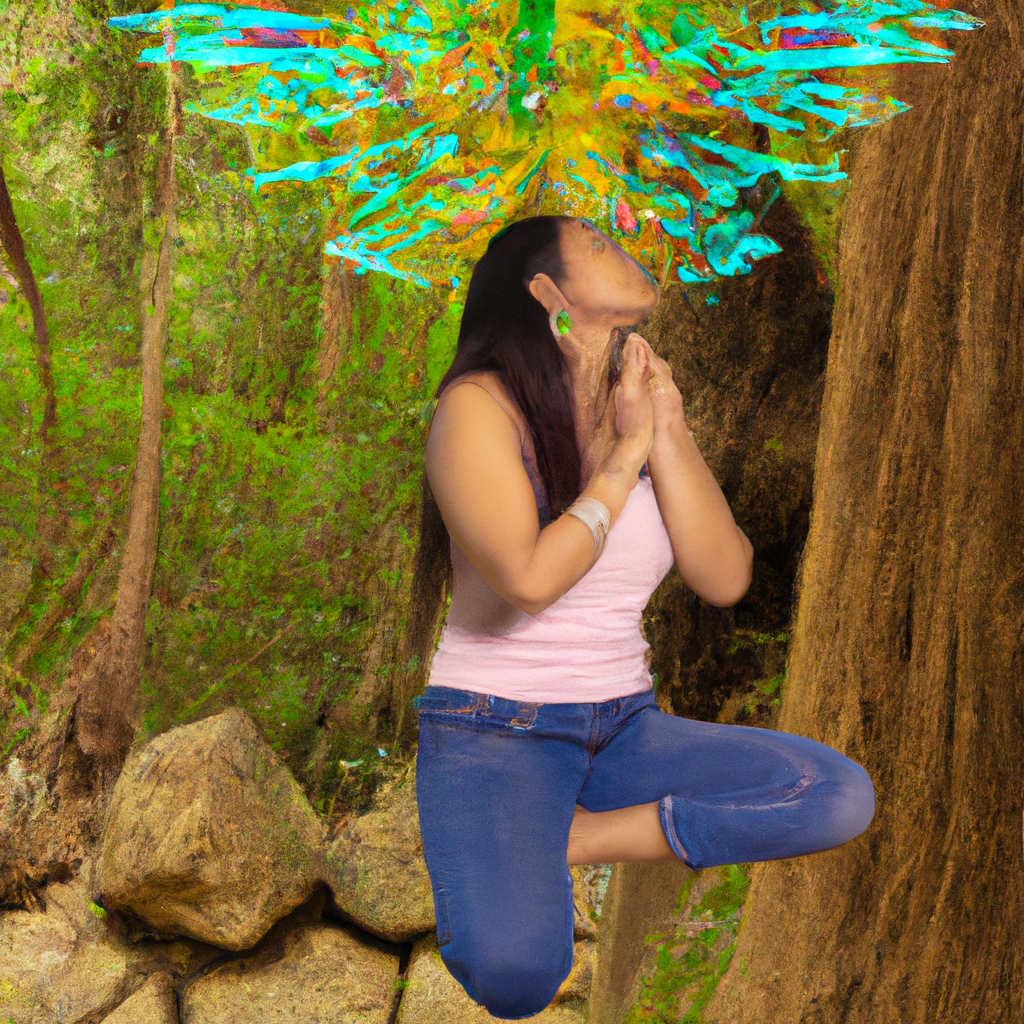

In [25]:
# Descargar imagen
respuesta = requests.get(image_medit['data'][0]['url'])

# Asegurar poder descargarla
if respuesta.status_code == 200:
    
    # Get filename
    filename = os.path.basename(image_medit['data'][0]['url'])
    
        # Agregar la extensión ".png"
    filename += ".png"
    
    # Directory to save the image
    directory = "./imagenes_generadas/"
    
    # Si el diretorio no existe, crearlo
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    #  Path para acceder
    filepath = os.path.join(directory, filename)
    
    # Guardar imagen
    with open(filepath, 'wb') as f:
        f.write(respuesta.content)
        
    print("La imagen ha sido descargada y almacenada correctamente en:", filepath)
    img = Image.open(filepath)
    print(f"Prompt utilizado: {text_to_image}")
    display(img)

else:
    print("Hubo un error al descargar la imagen.")


6. Resultados

7. Conclusiones

8. Referencias
9. 
https://openai.com/api/pricing/			
https://platform.openai.com/tokenizer
https://www.cba.gov.ar/articulo-que-son-pausas-activas-y-por-que-hacerlas/
AI Overview Gemini
		